### Chapter 3: Using Active Contours Segmentation

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import data
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour

#### Project 3-1: Using Active Contours Segmentation on a Skier

In [2]:
# page 67
# import an image of 2 skiers
image = Image.open("skiers.jpg")

# convert image into a numpy array
img = np.array(image)
img.shape

(569, 800, 3)

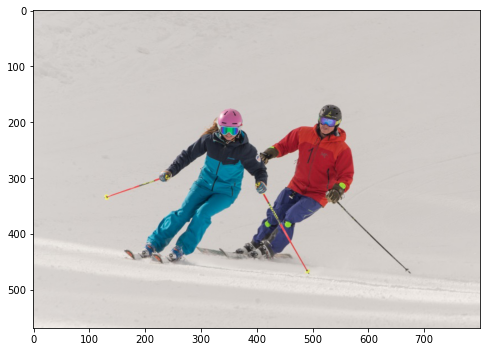

In [3]:
# plot the image
plt.figure(figsize=(8, 8))
plt.imshow(img);

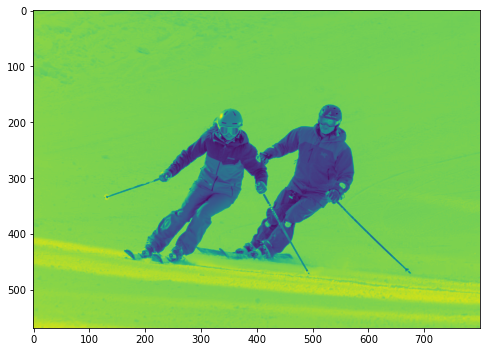

In [4]:
# convert the original image to a luminance image for contours
img = rgb2gray(img)

# view the transformation
plt.figure(figsize=(8, 8))
plt.imshow(img);

In [5]:
# initialize the spline
s = np.linspace(0, 2 * np.pi, 200)

# create a circle with radius 80 pixels centered at (250, 250)
init = 80 * np.array([np.cos(s), np.sin(s)]).T + 250

In [6]:
# fit spline to image
snake = active_contour(gaussian(img, 3), init)

<ipython-input-6-db8aad31fe28>:2: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(img, 3), init)


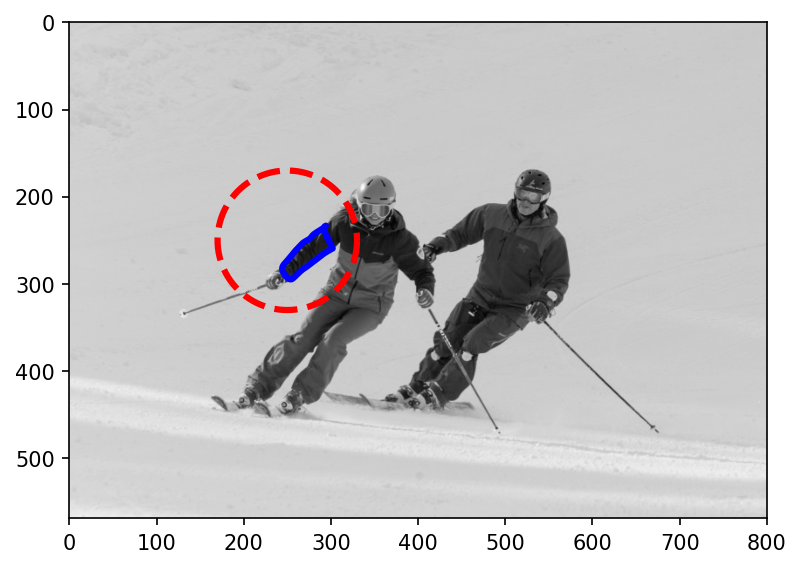

In [7]:
# plot the results
fig, ax = plt.subplots(dpi=150, figsize=(6, 6))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], "--r", lw=3)
ax.plot(snake[:, 0], snake[:, 1], "-b", lw=3)
ax.axis([0, img.shape[1], img.shape[0], 0]);